In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.image as mpimg
from ipywidgets import interact

In [2]:
def non_linear_cdict(steps, hex_col_array):
    """
    Translates hexadecimal color representation to a dictionary of rgb color value tuples.

    @param steps: a list of floats representing the values for which color gradients need to be defined.
    @param hex_col_array: a float value of an average relative humidity.
    @return cdict: a dictionary of rgb color value tuples.
    """

    red = 'red'
    green = 'green'
    blue = 'blue'

    cdict = {red: (), green: (), blue: ()}
    for s, hex_col in zip(steps, hex_col_array):
        rgb = matplotlib.colors.hex2color(hex_col)
        cdict[red] = cdict[red] + ((s, rgb[0], rgb[0]),)
        cdict[green] = cdict[green] + ((s, rgb[1], rgb[1]),)
        cdict[blue] = cdict[blue] + ((s, rgb[2], rgb[2]),)

    return cdict

In [3]:
def load_IE_data():
    df = pd.read_excel('IE_1x2_Small_Wall_Jan31.xlsx')
    df['X'] = round(df['X'] * 12, 1)
    df['Y'] = round(df['Y'] * 12, 1)
    df['Z1'] = np.where(df['Z'] <= 5, 5, df['Z'])
    df['Z1'] = np.where(((df['Z'] > 5) & (df['Z'] <= 10)), 10, df['Z1'])
    df['Z1'] = np.where((df['Z'] > 10) & (df['Z'] <= 12), 12, df['Z1'])
    df['Z1'] = np.where((df['Z'] > 14) & (df['Z'] <= 19), 0.5, df['Z1'])
    df['Z1'] = np.where((df['Z'] > 19), 0, df['Z1'])
    return df

In [4]:
def accuracy(df_r):
    count = 0 
    rows = len(df_r.index)
    cols = len(df_r.columns)
    
    for i in range(0, rows):
        for j in range(0, cols):
            if df_r.values[i,j] == True:
                count += 1

    return (count, rows * cols, count/(rows * cols) * 100)

In [5]:
PREDICTION_HC = ['#c20232', '#ffbd0a', '#aeb4b8', '#36454F']
PREDICTION_TH = [0, 0.025, 0.15, 1]

VEL_HC = ['#c20232', '#ffbd0a', '#868f95', '#5e6a72', '#36454F']
VEL_TH = [0, 0.25, 0.5, 0.75, 1]

PREDICTION_CDICT = non_linear_cdict(steps = PREDICTION_TH, hex_col_array = PREDICTION_HC)
PREDICTION_CM = matplotlib.colors.LinearSegmentedColormap('PREDICTION', PREDICTION_CDICT)

VEL_CDICT = non_linear_cdict(steps = VEL_TH, hex_col_array = VEL_HC)
VEL_CM = matplotlib.colors.LinearSegmentedColormap('VEL', VEL_CDICT)

PRED_HC = ['#36454F', '#5e6a72', '#868f95', '#ffbd0a', '#c20232']
PRED_TH = [0, 0.015, 0.15, 0.75, 1]

IEE_HC = ['#36454F', '#36454F', '#868f95', '#ffbd0a','#c20232']
IEE_TH = [0, 0.015, 0.03, 0.1, 1]

IE_HC = [ '#c20232','#ffbd0a', '#868f95', '#36454F', '#36454F']
IE_TH = [0, 0.015, 0.15, 0.95, 1]

IE_O_HC = ['#868f95', '#36454F', '#ffbd0a', '#c20232']
IE_O_TH = [0, 0.25, 0.55, 1]

IEE_CDICT = non_linear_cdict(steps = IEE_TH, hex_col_array = IEE_HC)
IEE_CM = matplotlib.colors.LinearSegmentedColormap('IEE', IEE_CDICT)

IE_CDICT = non_linear_cdict(steps = IE_TH, hex_col_array = IE_HC)
IE_CM = matplotlib.colors.LinearSegmentedColormap('IE', IE_CDICT)

IE_O_CDICT = non_linear_cdict(steps = IE_O_TH, hex_col_array = IE_O_HC)
IE_O_CM = matplotlib.colors.LinearSegmentedColormap('IE_O', IE_O_CDICT)

PRED_CDICT = non_linear_cdict(steps = PRED_TH, hex_col_array = PRED_HC)
PRED_CM = matplotlib.colors.LinearSegmentedColormap('PRED', PRED_CDICT)

VEL_CDICT = non_linear_cdict(steps = VEL_TH, hex_col_array = VEL_HC)
VEL_CM = matplotlib.colors.LinearSegmentedColormap('VEL', VEL_CDICT)

wall_img = mpimg.imread("./wall.png")
df = load_IE_data()

array([[<AxesSubplot:title={'center':'Z'}>]], dtype=object)

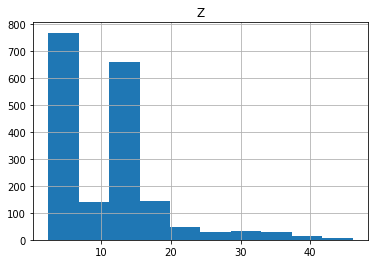

In [6]:
df.hist(column='Z')
#plt.xticks(np.arange(0, 46, 2))

array([[<AxesSubplot:title={'center':'Z1'}>]], dtype=object)

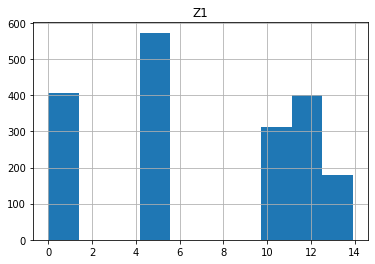

In [7]:
df.hist(column='Z1')
#plt.xticks(np.arange(0, 15, 1))

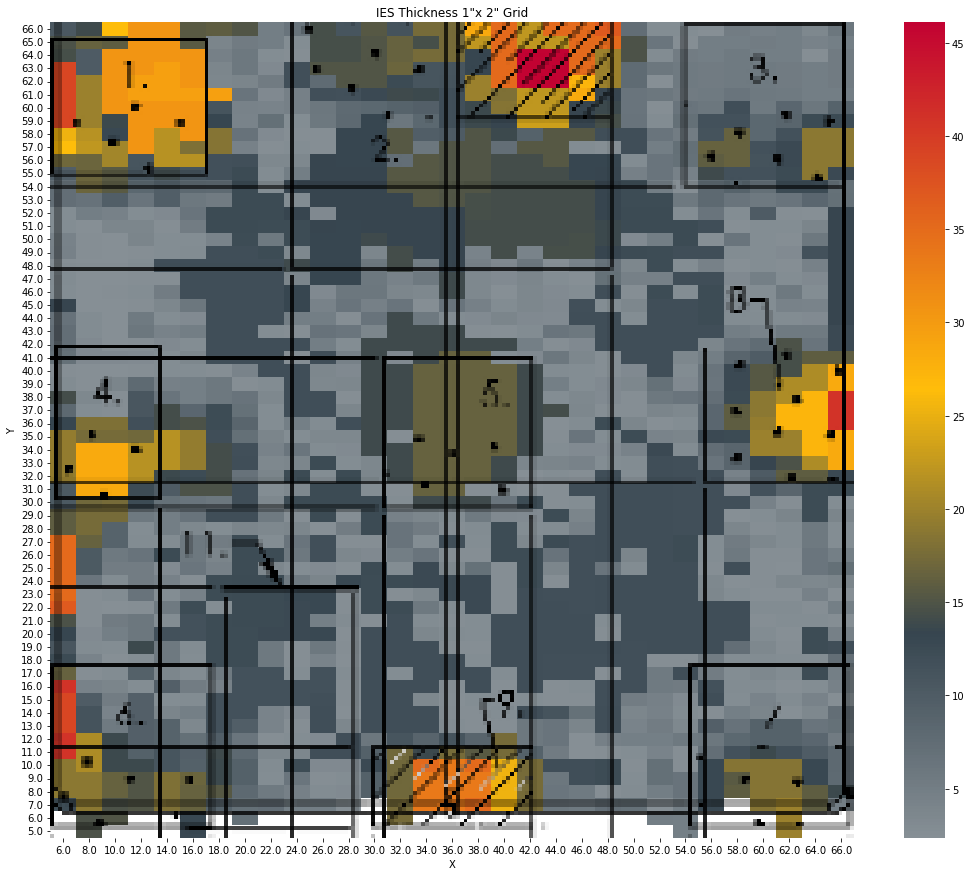

In [8]:
fig = plt.figure(figsize=(18, 15))
table = df.pivot('Y', 'X', 'Z')
ax = sns.heatmap(table, cmap = IE_O_CM)
ax.invert_yaxis()
plt.title('IES Thickness 1"x 2" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)

plt.savefig("IE_1x2_original.png")

plt.show()

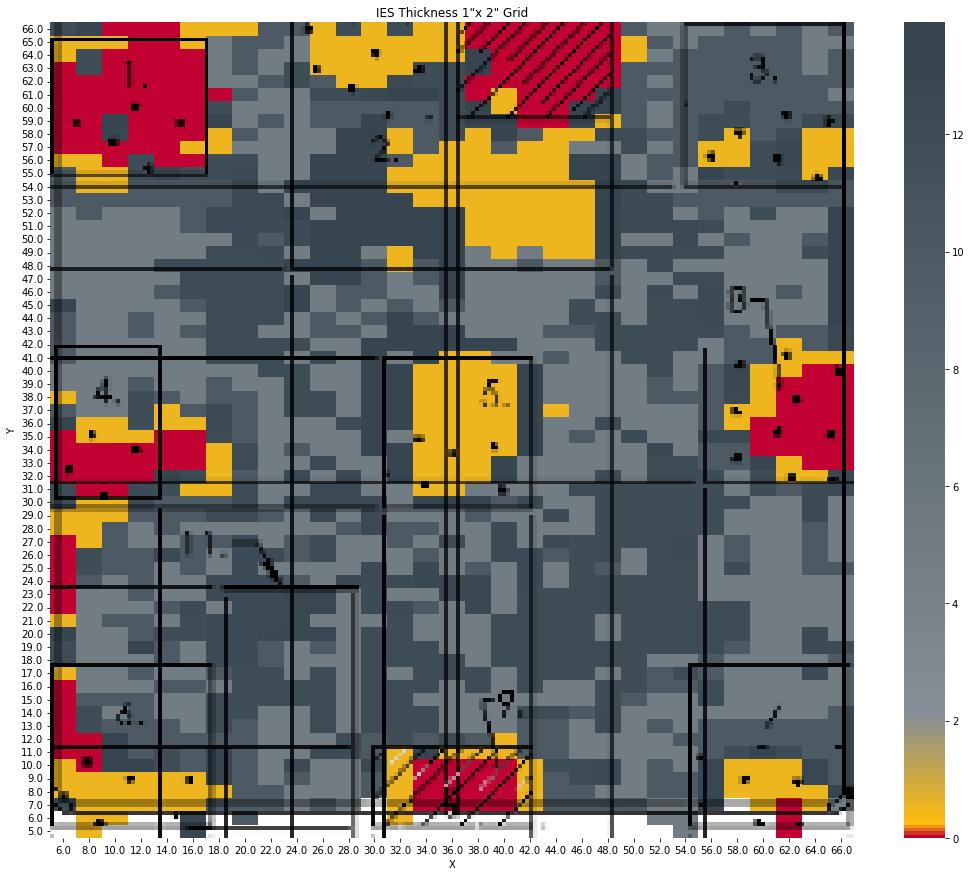

In [9]:
fig = plt.figure(figsize=(18, 15))
table = df.pivot('Y', 'X', 'Z1')
ax = sns.heatmap(table, cmap = IE_CM)
ax.invert_yaxis()
plt.title('IES Thickness 1"x 2" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)

plt.savefig("IE_1x2.png")

plt.show()

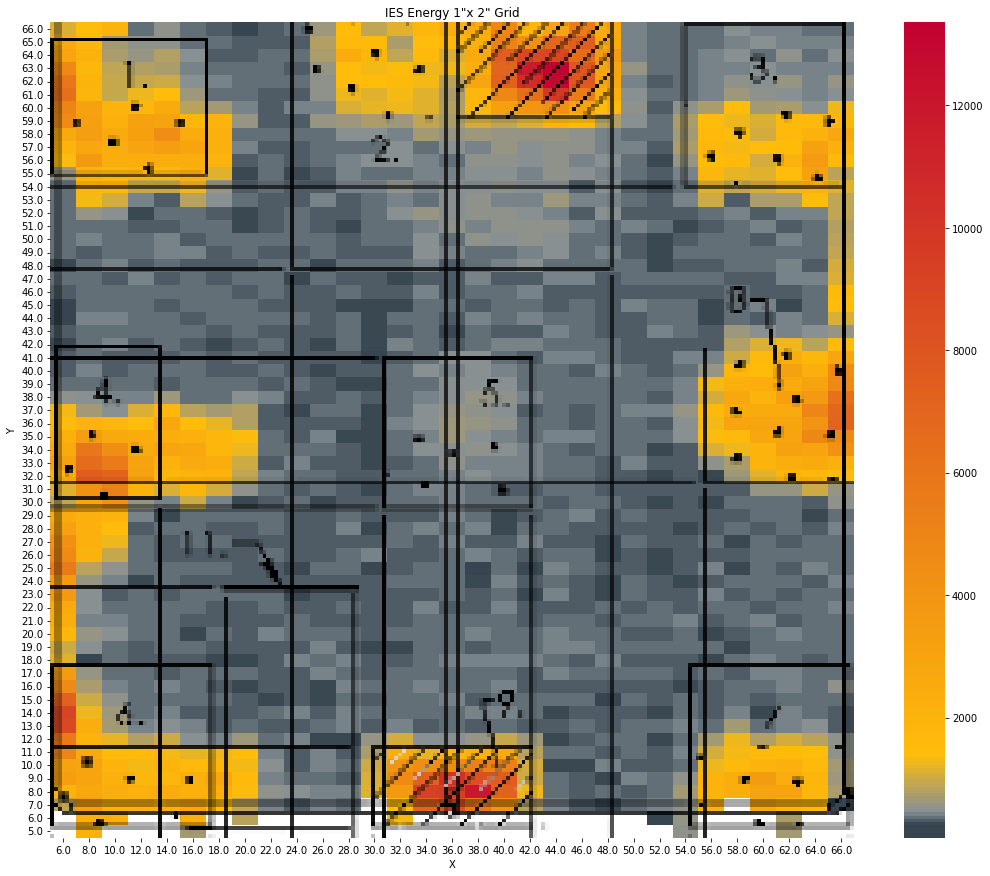

In [10]:
fig = plt.figure(figsize=(18, 15))
table = df.pivot('Y', 'X', 'E')
ax = sns.heatmap(table, cmap = IEE_CM)
ax.invert_yaxis()
plt.title('IES Energy 1"x 2" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)

plt.savefig("IEE_1x2.png")
plt.show()

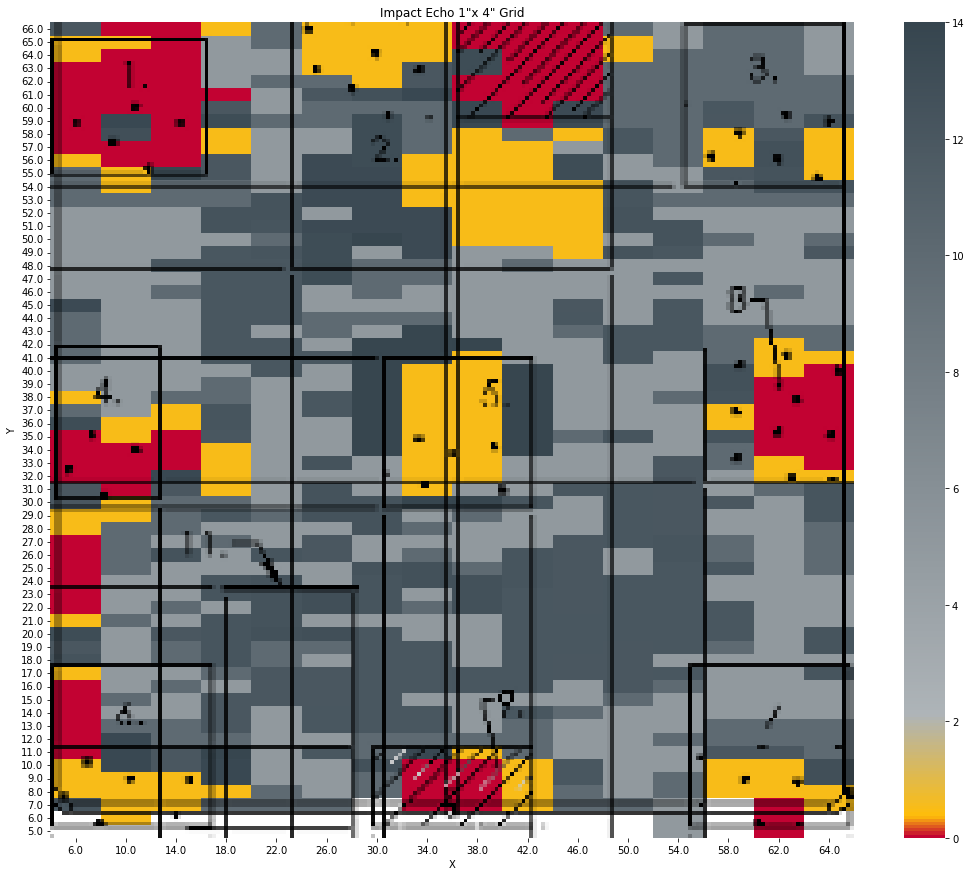

In [11]:
x1 = [6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 64]
df1 = df[df.X.isin(x1)]

fig = plt.figure(figsize=(18, 15))
table = df1.pivot('Y', 'X', 'Z1')
ax = sns.heatmap(table, cmap = PREDICTION_CM, vmax = 14)
ax.invert_yaxis()
plt.title('Impact Echo 1"x 4" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)
plt.savefig("IEE_1x2.png")
plt.show()

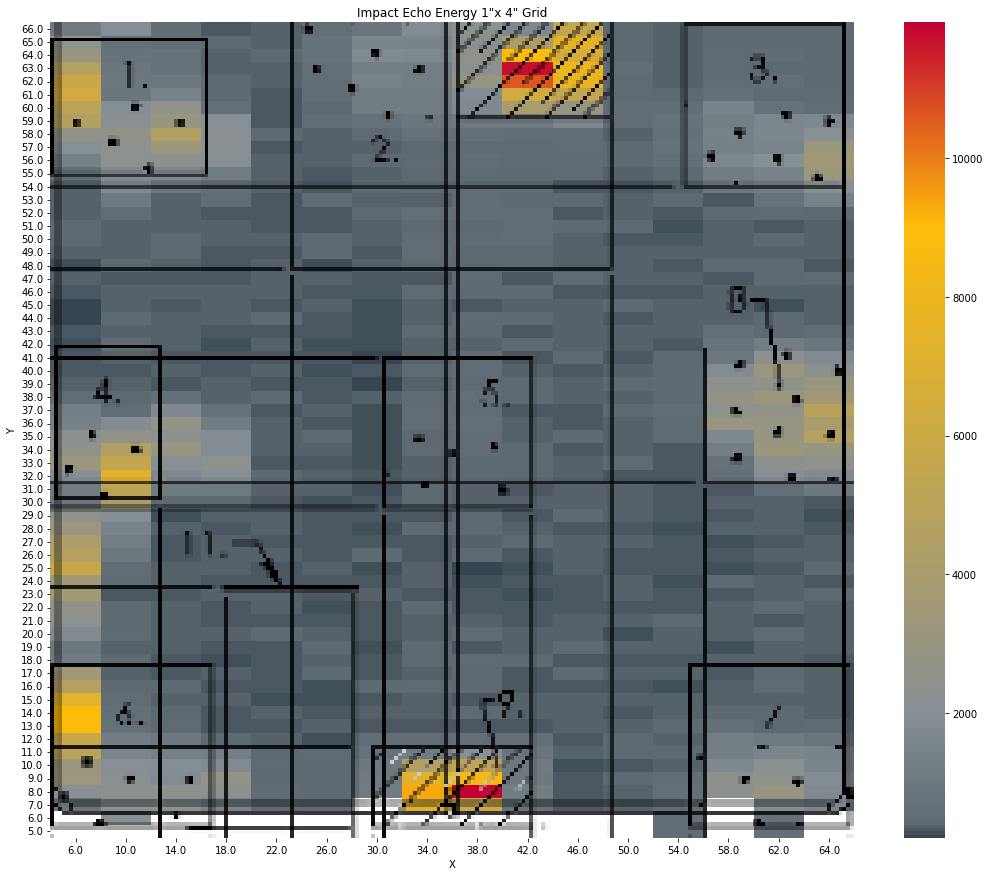

In [12]:
fig = plt.figure(figsize=(18, 15))
table = df1.pivot('Y', 'X', 'E')
ax = sns.heatmap(table, cmap = PRED_CM)
ax.invert_yaxis()
plt.title('Impact Echo Energy 1"x 4" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)
plt.show()

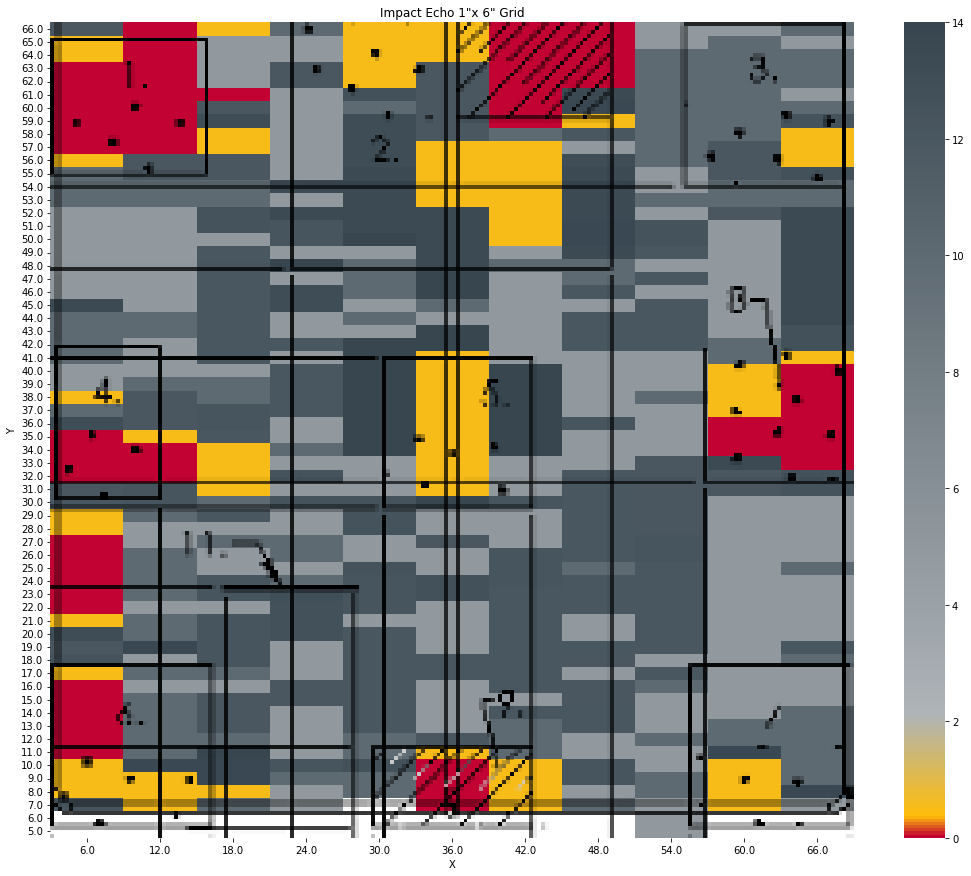

In [13]:
x2 = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]
df2 = df[df.X.isin(x2)]

fig = plt.figure(figsize=(18, 15))
table = df2.pivot('Y', 'X', 'Z1')
ax = sns.heatmap(table, cmap = PREDICTION_CM, vmax = 14)
ax.invert_yaxis()
plt.title('Impact Echo 1"x 6" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)
plt.show()

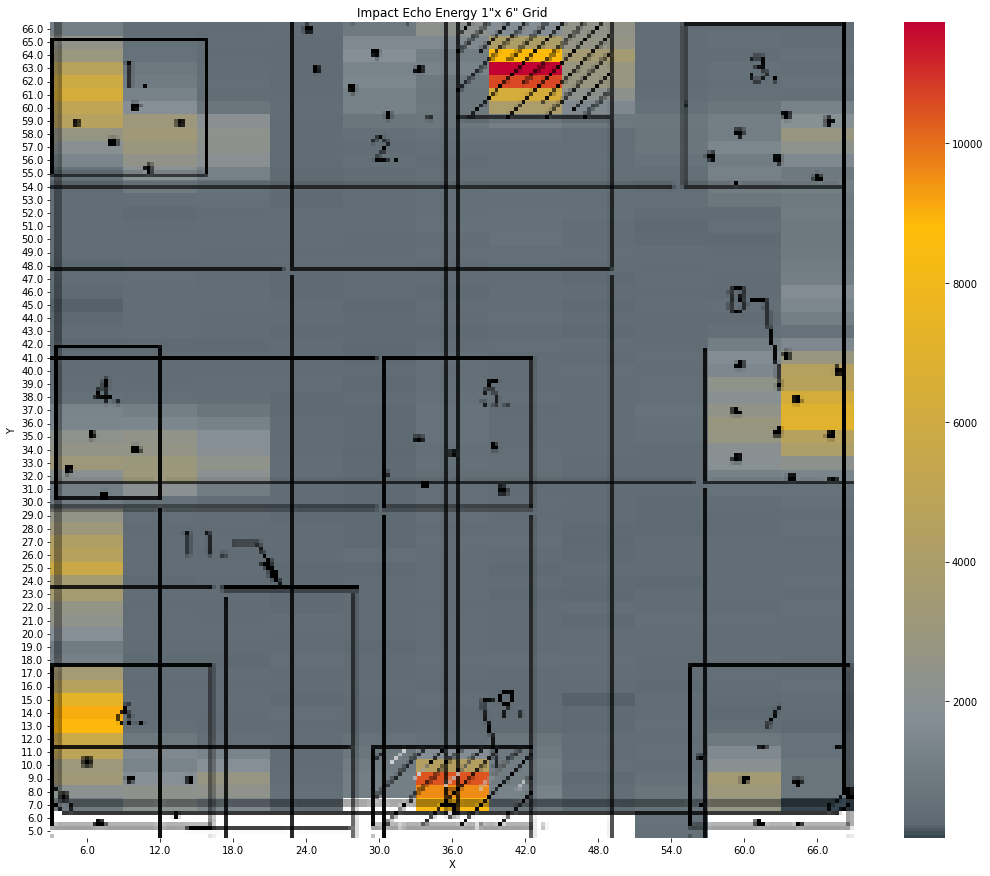

In [14]:
fig = plt.figure(figsize=(18, 15))
table = df2.pivot('Y', 'X', 'E')
ax = sns.heatmap(table, cmap = PRED_CM)
ax.invert_yaxis()
plt.title('Impact Echo Energy 1"x 6" Grid')
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)
plt.show()

In [15]:
df_sw = pd.read_csv('sasw.txt')

def olson_data(wavelength):
    print('wavelength', wavelength)
    df1 = df_sw[df_sw['Wavelength'] == wavelength]
    fig = plt.figure(figsize=(18, 15))
    table = df1.pivot('Y', 'X', 'Velocity')
    ax = sns.heatmap(table, cmap = VEL_CM)
    ax.invert_yaxis()
    plt.show()
    
interact(olson_data, wavelength=(2.75, 5.25, 0.5))

interactive(children=(FloatSlider(value=3.75, description='wavelength', max=5.25, min=2.75, step=0.5), Output(…

<function __main__.olson_data(wavelength)>

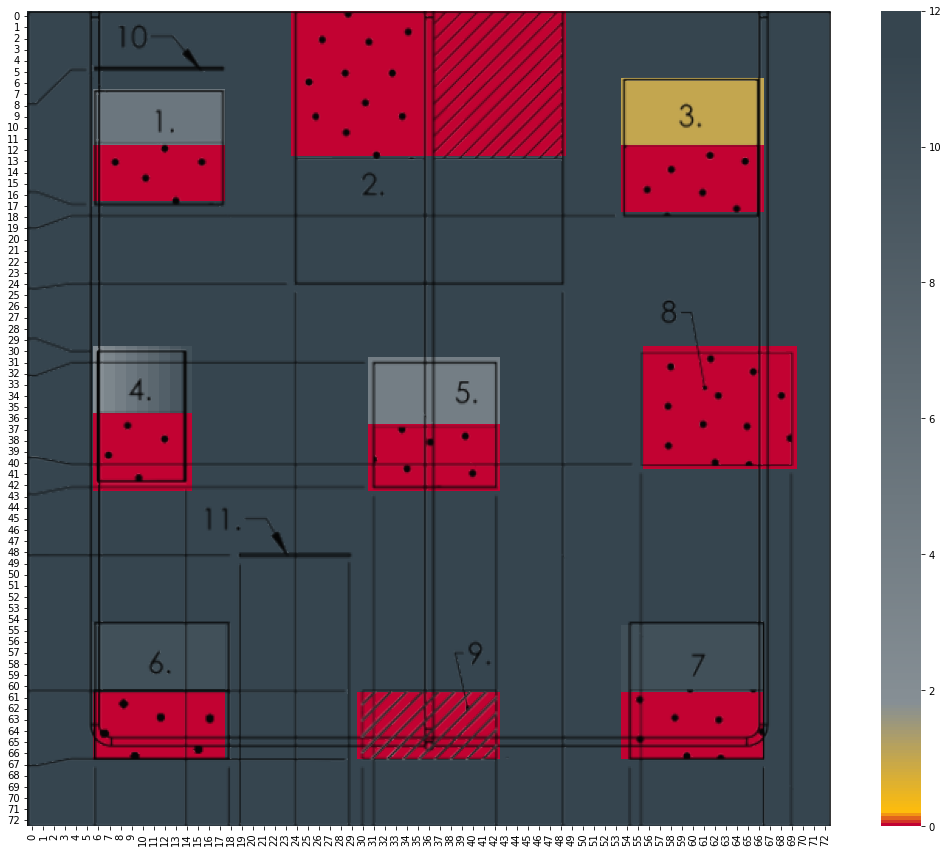

In [16]:
df_t = pd.read_excel('IE_Small_Wall_Truth_Data.xlsx')
wall_img = mpimg.imread("./wall1.png")
fig = plt.figure(figsize=(18, 15))
ax = sns.heatmap(df_t, cmap = IE_CM)
ax.imshow(wall_img,
          aspect=ax.get_aspect(),
          extent= ax.get_xlim() + ax.get_ylim(),
          zorder=1)
plt.savefig("IE_Truth_Data_1x2.png")
plt.show()

In [17]:
df_c = df.pivot('Y', 'X', 'Z1')

df_t.index.name = 'Y'
df_t.columns.name = 'X'
df_t = df_t.drop(index=[0, 1, 2, 3, 4, 67, 68, 69, 70, 71, 72], 
                 columns=[0, 1, 2, 3, 4, 5, 67, 68, 69, 70, 71, 72, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 51, 53, 55, 57, 59, 61, 63, 65])
df_r = df_t == df_c

accuracy(df_r)

(170, 1922, 8.844953173777315)